In [1]:
import os
import sys
import time
import math

# Fisrt, we add the location of the library to test to the PYTHON path
from liblibra_core import *
from libra_py import units
import libra_py.workflows.nbra.lz as lz
import libra_py.workflows.nbra.step4 as step4
from libra_py import data_visualize
from libra_py import data_conv, data_stat, data_outs, data_read
from libra_py import fit
import libra_py.workflows.nbra.decoherence_times as decoherence_times
from libra_py import influence_spectrum

import numpy as np
import h5py
import matplotlib.pyplot as plt

colors = {}
colors.update({"1": '#000000'})  # Black 
colors.update({"2": '#000099'})  # Blue  
colors.update({"3": '#006400'})  # Green 
colors.update({"4": '#990000'})  # Red   
colors.update({"5": '#8B008B'})  # Purple
colors.update({"6": '#FF8C00'})  # Orange
colors.update({"9": '#4d4d4d'})  # Gray  
color_index = ["1","2","3","4","5","6","9"]


colors.update({"11": "#8b1a0e"})  # red       
colors.update({"12": "#FF4500"})  # orangered 
colors.update({"13": "#B22222"})  # firebrick 
colors.update({"14": "#DC143C"})  # crimson   

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen  
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive      

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue  

colors.update({"41": "#2F4F4F"})  # darkslategray

clrs_index = ["11", "21", "31", "41", "12", "22", "32", "13","23", "14", "24",
              "11", "21", "31", "41", "12", "22", "32", "13","23", "14", "24",
              "11", "21", "31", "41", "12", "22", "32", "13","23", "14", "24"  ]


The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


/home/alexey/Conda/Miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/alexey/Conda/Miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, false> > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/alexey/Conda/Miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::v

In [2]:
absolute_path = os.getcwd()
params = {}
params["data_set_paths"] = []
params["data_set_paths"].append(absolute_path+"/res_mb_sp/")

params["Hvib_re_prefix"] = "Hvib_ci_"; params["Hvib_re_suffix"] = "_re"
params["Hvib_im_prefix"] = "Hvib_ci_"; params["Hvib_im_suffix"] = "_im"
params["nfiles"]         = 1999
params["init_times"]     = [5000]
params["nstates"]        = 11 # total number of electronic states
params["active_space"]   = list(range(11)) # indexing is from 0!

# Include HOMO and up to the last electronic state
hvib = step4.get_Hvib2(params)
print ("Length of hvib is: ", len(hvib[0]))

Length of hvib is:  1999


In [3]:
def get_gs_energy(file):
    
    f = open(file, "r")
    A = f.readlines()
    f.close()
        
    for a in A:
        tmp = a.split()
        if len(tmp)==3:
            if tmp[0]=="Total" and tmp[1]=="energy:":
                e = float(tmp[2])
                
    return e

In [4]:
E0 = []

for i in range(5000, 6999):
    name = F"all_logfiles/step_{i}.log"
    E0.append( get_gs_energy(name) )


In [5]:
print(len(E0))

1999


In [6]:
t = []
E1 = []

for i in range(0, 1999):
    t.append(i)
    e1 = E0[i] + hvib[0][i].get(1,1).real
    E1.append(e1)

In [7]:
print(E1)

[-406.023194995939, -406.02354639147916, -406.0238082612118, -406.02408799199634, -406.0243184585473, -406.0243686597538, -406.0242390909076, -406.0239691502723, -406.0235730761955, -406.0230916229333, -406.02255796212063, -406.02198608848806, -406.021353570162, -406.0206916804154, -406.02000563141496, -406.0192886834978, -406.018560168305, -406.017804890198, -406.01706468756674, -406.0162906320236, -406.0154439640277, -406.0145310438844, -406.01356589317925, -406.01256424495523, -406.0115441107194, -406.01057267574885, -406.0096675945599, -406.00883079253873, -406.00809491669844, -406.00747994567496, -406.0069982660651, -406.0066702207324, -406.00652007361566, -406.00654126829295, -406.00671560047823, -406.0070118241425, -406.00737978346524, -406.0077756682805, -406.00819395300215, -406.0086388026355, -406.00910906775636, -406.0095763912416, -406.0100470992013, -406.0105297824073, -406.01104936709345, -406.0115953174291, -406.0121497507165, -406.0127005034896, -406.0132303507926, -406

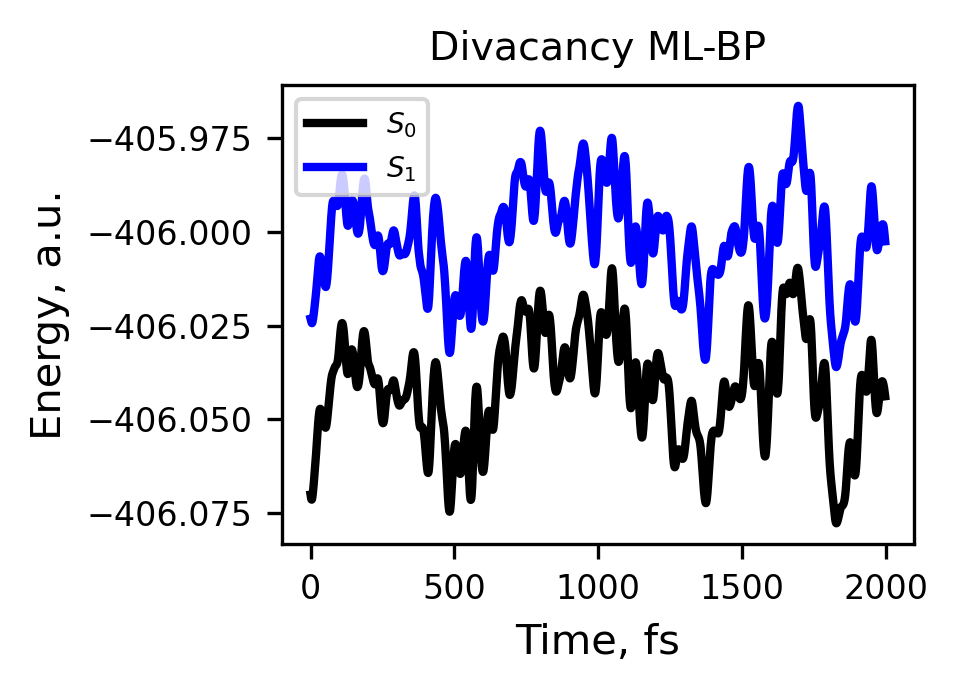

In [8]:
plt.rc('axes', titlesize=12)      # fontsize of the axes title
plt.rc('axes', labelsize=12)      # fontsize of the x and y labels
plt.rc('legend', fontsize=10)     # legend fontsize
plt.rc('xtick', labelsize=8)    # fontsize of the tick labels
plt.rc('ytick', labelsize=8)    # fontsize of the tick labels
plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)



figure = plt.figure(num=None, figsize=(3.21, 2.41), dpi=300, edgecolor='black', frameon=True)        


plt.plot(t, E0, color="black", label="$S_0$", linewidth=2 )
plt.plot(t, E1, color="blue", label="$S_1$", linewidth=2 )

plt.title("Divacancy ML-BP",fontsize=9.5)
plt.legend(fontsize=6.75, ncol=1, loc='upper left')
plt.xlabel('Time, fs',fontsize=10)
plt.ylabel('Energy, a.u.',fontsize=10)
plt.tight_layout()
plt.savefig(F'nbra.png', dpi=300)
plt.show()